/home/yana/anaconda3/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/yana/anaconda3/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-1-172a34147c23>:26: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``re

<IPython.core.display.Javascript object>


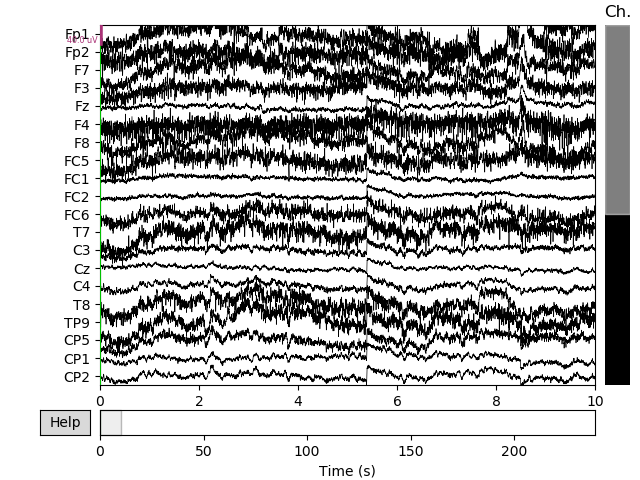

<IPython.core.display.Javascript object>


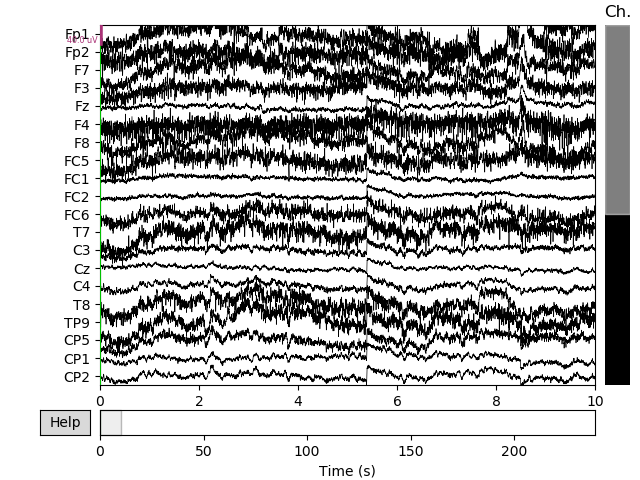

In [1]:
import numpy as np
import pandas as pd
import mne
from mne import create_info
from mne.channels import read_montage
from mne.io import RawArray

%matplotlib notebook

def create_mne_raw_object(filename):
    data = pd.read_csv(filename)
    ch_names = list(data.columns[1:])
    montage = read_montage('standard_1005', ch_names)

    ev_filename = filename.replace('_data', '_events')

    events = pd.read_csv(ev_filename)
    events_names = events.columns[1:]
    events_data = np.array(events[events_names]).T

    data = np.concatenate((1e-7 * np.array(data[ch_names]).T, events_data))

    ch_type = ['eeg'] * len(ch_names) + ['stim'] * 6

    ch_names.extend(events_names)
    info = create_info(ch_names, sfreq=500.0, ch_types=ch_type, montage=montage)

    return RawArray(data, info, verbose=False)

my_path = "../"
filename = my_path+"subj1_series1_data.csv"
raw = create_mne_raw_object(filename)
raw.plot()


In [2]:
data = pd.read_csv(filename)
ch_names = list(data.columns[1:])
my_n = len(ch_names)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 32 components
Fitting ICA took 16.1s.


<IPython.core.display.Javascript object>


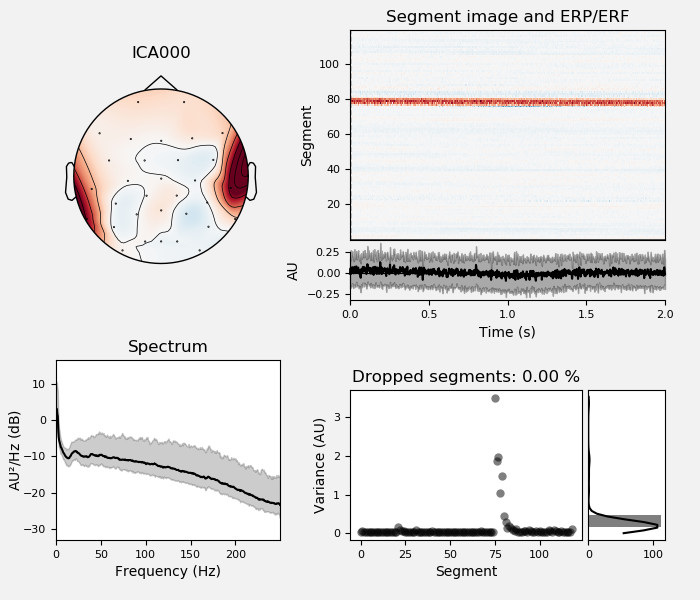

    Using multitaper spectrum estimation with 7 DPSS windows
119 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


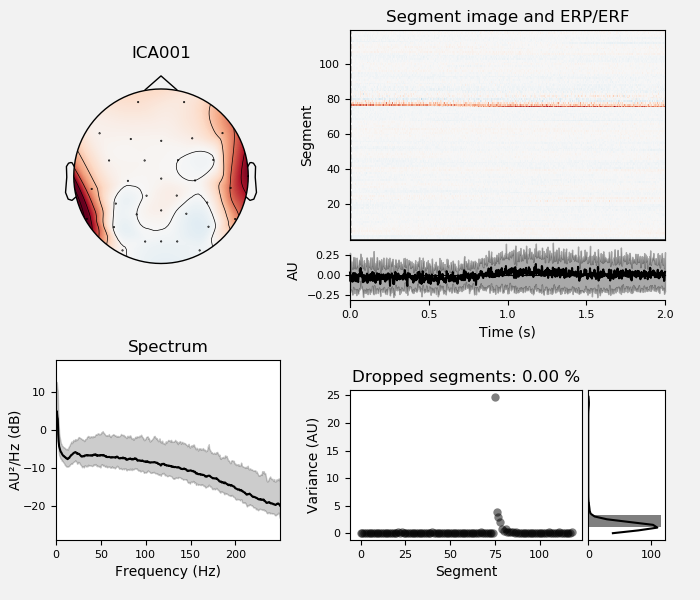

119 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


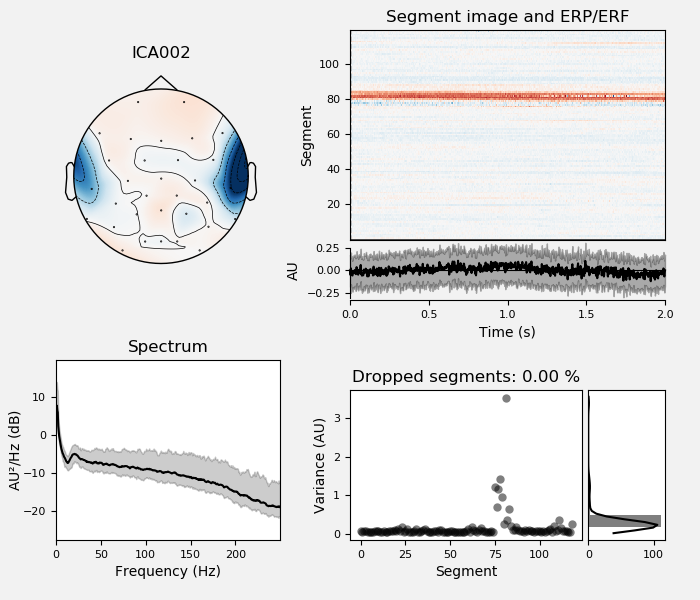

119 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


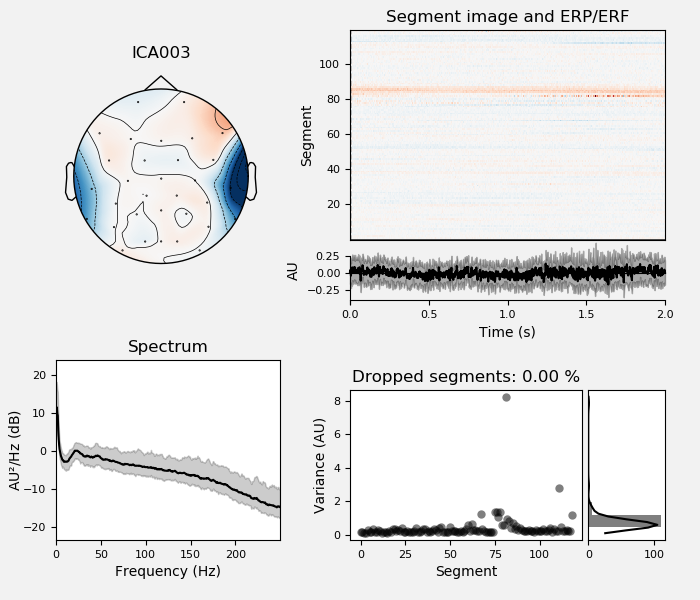

119 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


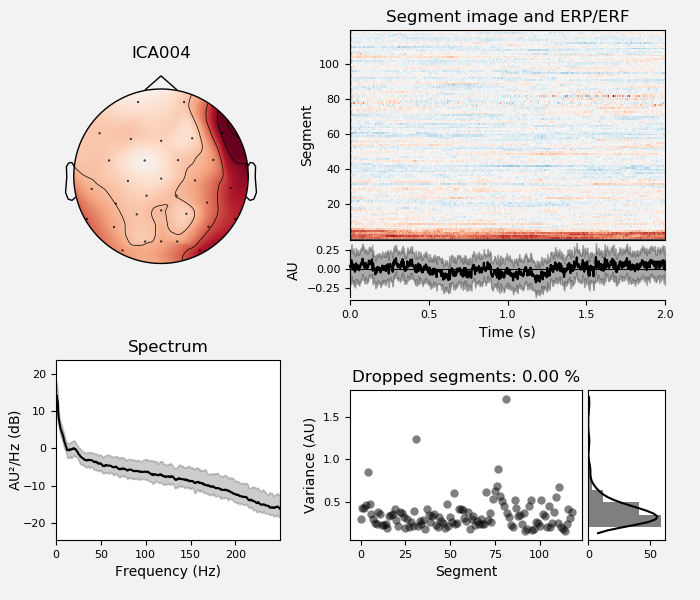

119 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [3]:
ica = mne.preprocessing.ICA(n_components=my_n, random_state=97, max_iter=800)
ica.fit(raw)
#ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw)

Transforming to ICA space (32 components)
Zeroing out 0 ICA components


<IPython.core.display.Javascript object>


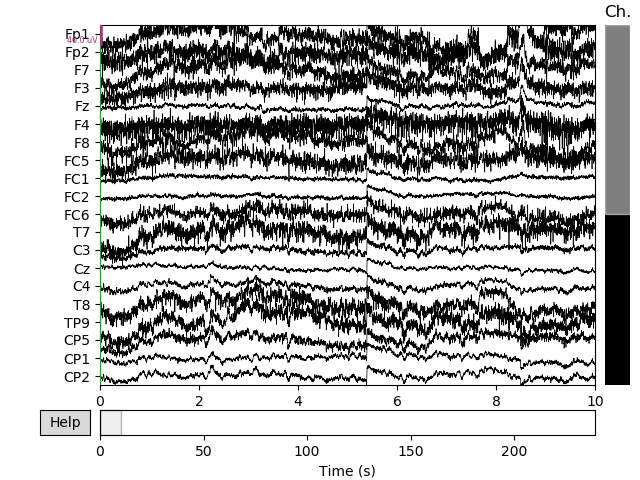

<IPython.core.display.Javascript object>


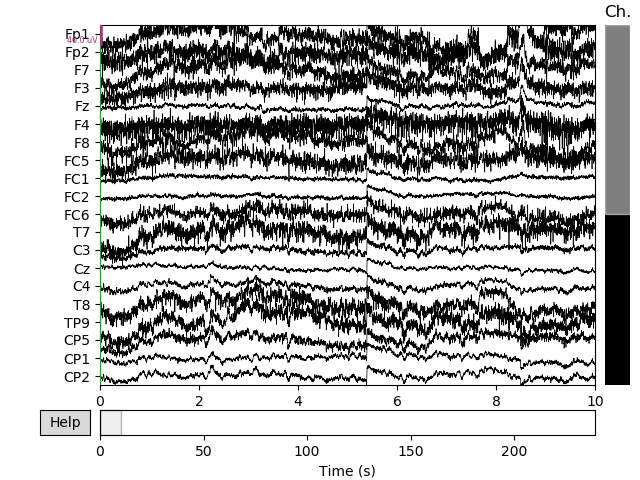

<IPython.core.display.Javascript object>


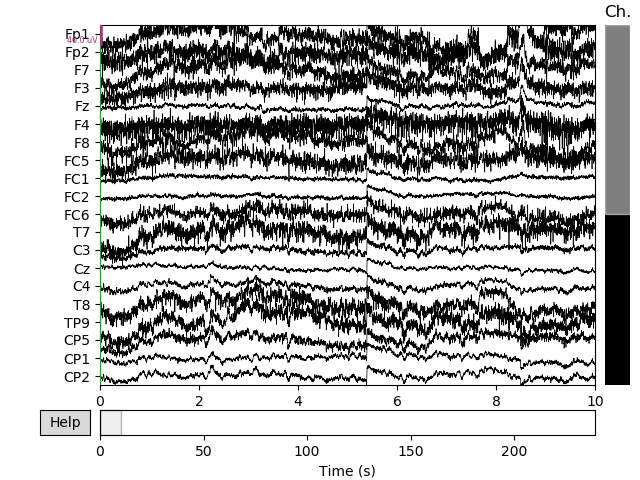

In [5]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
#chs = ['EEG 0{:02}'.format(n) for n in range(41, 60)]
#chan_idxs = [raw.ch_names.index(ch) for ch in chs]
#orig_raw.plot(order=chan_idxs, start=12, duration=4)
#raw.plot(order=chan_idxs, start=12, duration=4)
orig_raw.plot()
raw.plot()

<IPython.core.display.Javascript object>


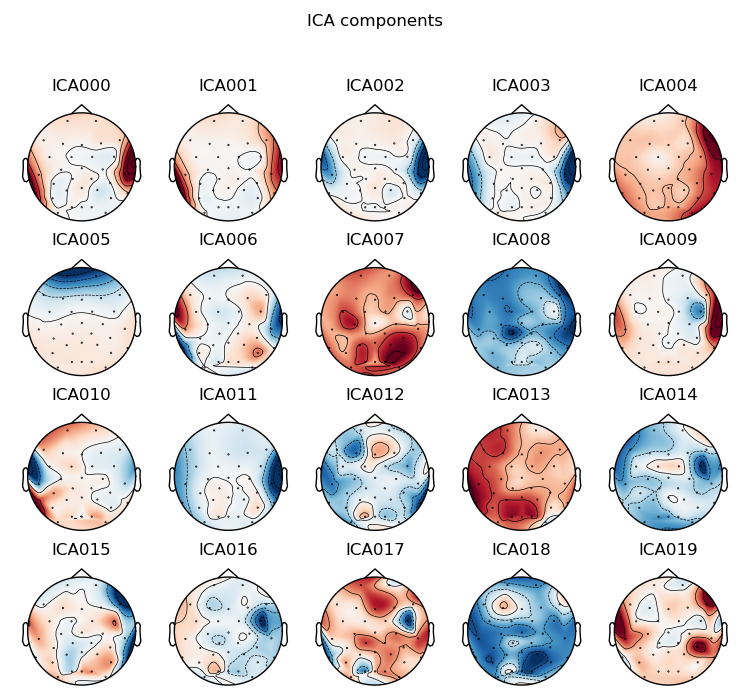

<IPython.core.display.Javascript object>


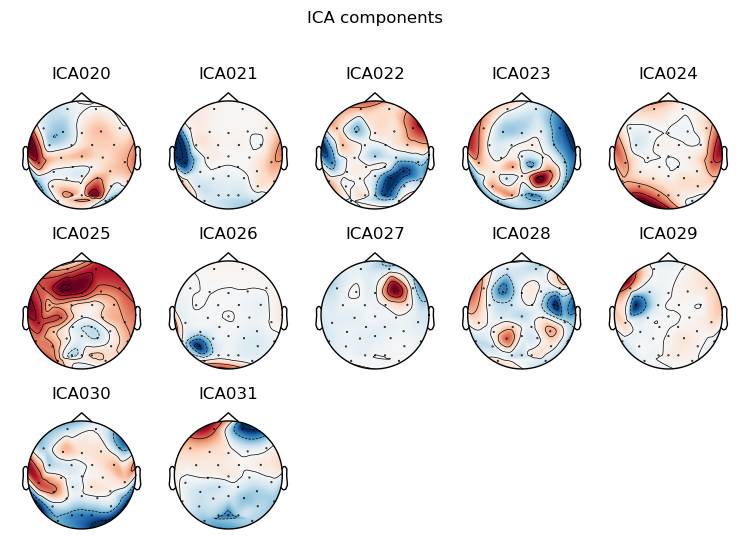

[<Figure size 750x700 with 20 Axes>, <Figure size 750x550 with 15 Axes>]

In [6]:
ica.plot_components()

<IPython.core.display.Javascript object>


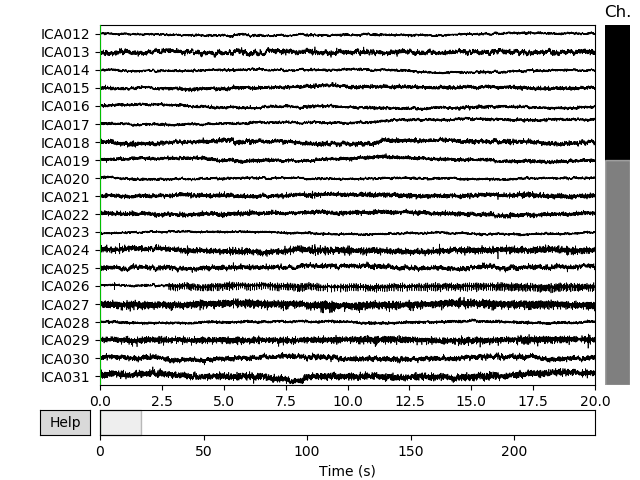

<IPython.core.display.Javascript object>


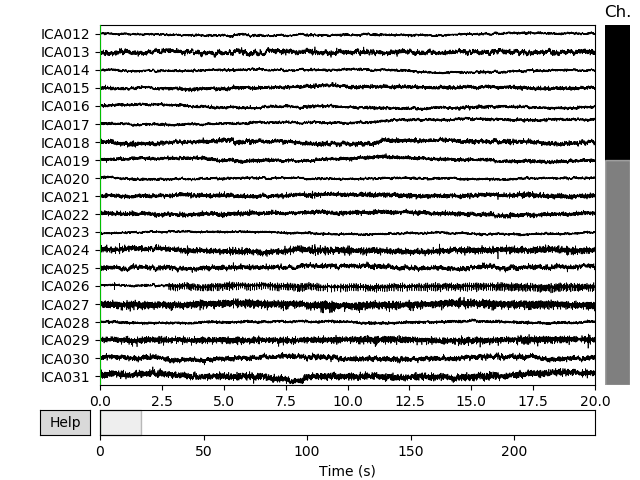

In [7]:
raw.load_data()
ica.plot_sources(raw)

<IPython.core.display.Javascript object>


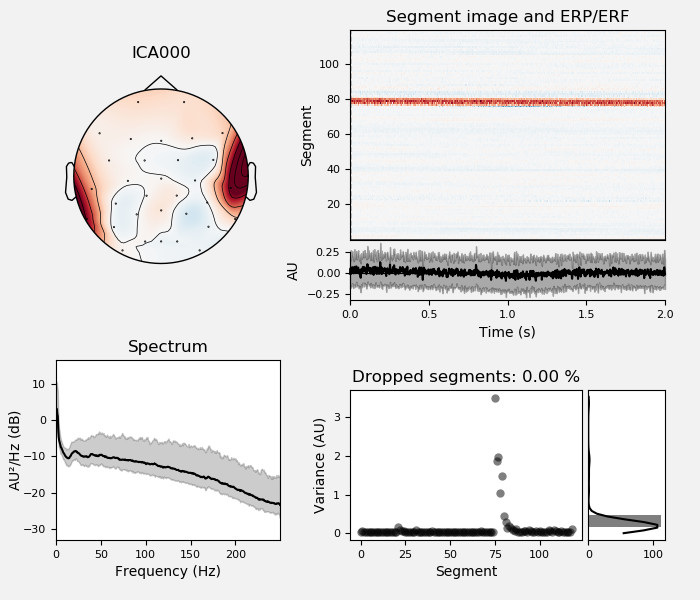

    Using multitaper spectrum estimation with 7 DPSS windows
119 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


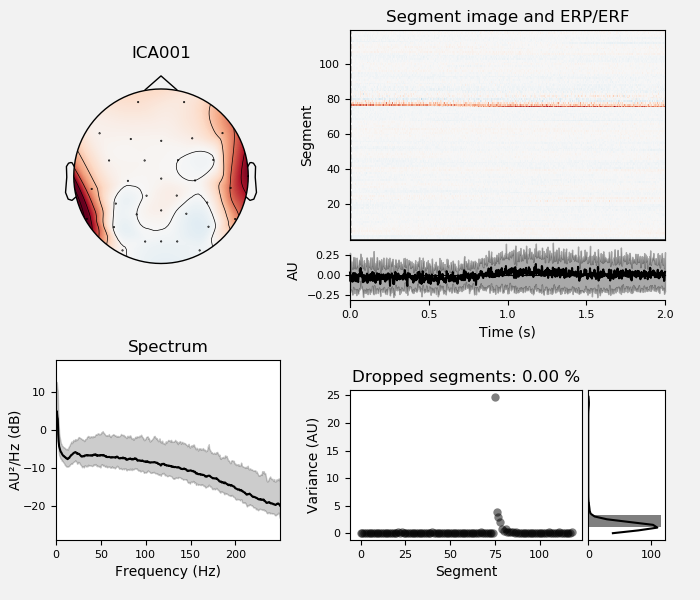

119 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [8]:
ica.plot_properties(raw, picks=[0, 1])

<IPython.core.display.Javascript object>


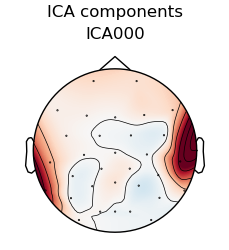

<IPython.core.display.Javascript object>


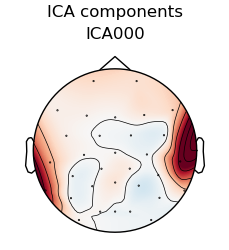

In [12]:
ica.plot_components([0])